In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:

df = pd.read_csv("./dataset.csv")
# replacing B to -1 and M to 1 in target "diagnosis"
df['diagnosis'].replace(['B', 'M'], [0, 1], inplace=True)
df.drop(['id'], axis=1, inplace=True)


# df.dropna(inplace=True)
# df.drop(['id'],axis=1, inplace=True)



In [3]:
class LogisticRegression:
    
    def __init__(self, lr=0.01, epoch=1000):
        self.learning_rate = lr
        self.epoch = epoch
        self.weights = None
        self.bias = None
        self.cost=np.zeros(epoch)
        #self.history=[]
    

    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    

    def loss(self, h, y):
        limit = 10**(-15)
        for i in range(h.shape[0]):
            if h[i]<(limit):
                h[i]+=(limit)
            elif (1-h[i])<limit:
                h[i]-=(limit)
        
#         print("Loss is :",h)
        loss =(-y * np.log(h) -(1 - y) * np.log(1 - h)).mean()
        return loss
    
    def batchgradient(self,X,y):
        
        print("Using batch gradient")
        n_samples, n_features = X.shape
        for epoch in range(self.epoch):
        # Compute the gradient using the entire dataset
            z = np.dot(X,self.weights) + self.bias
            y_pred = self.sigmoid(z)
            error = y_pred - y      #computes diff betwn the predicted probs and the true target values
            #Computes gradient of the cost function with respect to the weight parameters
            grad_w = np.dot(X.T, error) / n_samples 
            #Computes the gradient of the cost function with respect to the bias parameter
            grad_b = np.mean(error)

            # Update the weights and bias
            self.weights -= self.learning_rate * grad_w
            self.bias -= self.learning_rate * grad_b
            self.cost[epoch]=self.loss(y_pred,y)
            
            #self.history.append((epoch,self.cost(X,y)))
            
            #self.history.append((epoch,self.cost(X,y)))
    
    def minibatchgradient(self,X,y, batch_size = 40):
        print("Using mini batch gradient")
        print("batch size is  ", batch_size)
        n_samples, n_features = X.shape
        X = X.to_numpy()
        y = y.to_numpy()
        for epoch in range(self.epoch):
           
            # Split the data into mini-batches
            n_batches = n_samples // batch_size      #Compute the number of mini-batches.
            epoch_err = np.zeros(n_batches)
            for batch_idx in range(n_batches):  #Loop over each mini-batch.
                start = batch_idx * batch_size   #Compute the starting index of the mini-batch.
                end = start + batch_size      #Compute the ending index of the mini-batch.
                X_batch = X[start:end]  
                y_batch = y[start:end]
                
                # Compute the gradients using the mini-batch
                z = np.dot(X_batch, self.weights) + self.bias
     #Apply the sigmoid function to the linear combination to obtain the predicted output probabilities
                y_pred = self.sigmoid(z)
                error = y_pred - y_batch          #Calci diff between predicted and true values
            #Compute the gradient of the loss with respect to the weights using the mini-batch
                grad_w = np.dot(X_batch.T, error) / batch_size
                grad_b = np.sum(error) / batch_size
                
                # Update the weights and bias
                self.weights -= self.learning_rate * grad_w
                self.bias -= self.learning_rate * grad_b
                epoch_err[batch_idx] = self.loss(y_pred,y_batch)
            self.cost[epoch] = epoch_err.mean()
                
    def stochasticgradient(self,X,y):
            
            print("Using stochastic gradient")
            n_samples, n_features = X.shape
            self.weights = np.zeros(n_features)


#           same as doing minibatch with batch size = 1
            self.minibatchgradient(X,y,1)
            


                
            
    def fit(self, X, y,key):
        
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        if key==0:
            
            self.batchgradient(X,y)
    
        elif key==1:
            
            self.minibatchgradient(X,y)
        
        else:
            
            self.stochasticgradient(X,y)
        
            
    
    def predict(self, X,threshold):
        
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        for i in range(y_pred.shape[0]):
            if(y_pred[i] >=threshold):
                y_pred[i] =1
            else:
                y_pred[i]=0
        
        return y_pred
    
    
    
    def accuracy(self,X,y,threshold):

        y_predict=self.predict(X,threshold)
        n=len(X)
        accu=d=0  #Initializes accuracy variable to zero.d is index of current instance being evaluated.

        for i in y:
            if (i==y_predict[d]):
                accu+=1
            d+=1           

        accu=accu/n
        return accu
    

    def precision(self,X,y,threshold):
            
        y_predict=self.predict(X,threshold)   
        d=0
        true_pos=0
        c=0

        for i in y:
            if (i==1 and y_predict[d]==1):
                true_pos+=1
            if(y_predict[d]==1):
                c+=1

            d+=1                                  #Increments d to keep track of the current instance being evaluated.

        true_pos=true_pos/c
        return true_pos
   
    
    def recall(self,X,y,threshold):
        
        y_predict=self.predict(X,threshold)   
        d=true_pos=false_neg=0

        for i in y:
            if (i==1 and y_predict[d]==1):
                true_pos+=1

            if (y_predict[d]==0 and i==1):
                false_neg+=1

            d+=1

        rec=true_pos/(true_pos+false_neg)
        return rec

        
        

Enter 0/1/2 for batch/minibatch/stochastic
0
enter threshold for non normalized
0.5
Iteration number :  1 

Using batch gradient


C:\Users\Bhaarath\AppData\Local\Temp\ipykernel_20076\3141254476.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


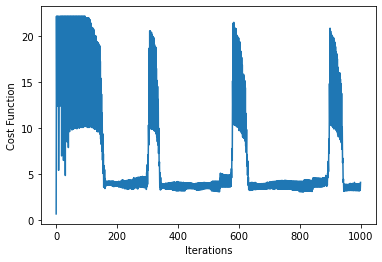

Accuracy,Precision,Recall =  0.9468085106382979 0.9452054794520548 0.92

Iteration number :  2 

Using batch gradient


C:\Users\Bhaarath\AppData\Local\Temp\ipykernel_20076\3141254476.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Iteration number :  3 

Using batch gradient


C:\Users\Bhaarath\AppData\Local\Temp\ipykernel_20076\3141254476.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Iteration number :  4 

Using batch gradient


C:\Users\Bhaarath\AppData\Local\Temp\ipykernel_20076\3141254476.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Iteration number :  5 

Using batch gradient


C:\Users\Bhaarath\AppData\Local\Temp\ipykernel_20076\3141254476.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Iteration number :  6 

Using batch gradient


C:\Users\Bhaarath\AppData\Local\Temp\ipykernel_20076\3141254476.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Iteration number :  7 

Using batch gradient


C:\Users\Bhaarath\AppData\Local\Temp\ipykernel_20076\3141254476.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Iteration number :  8 

Using batch gradient


C:\Users\Bhaarath\AppData\Local\Temp\ipykernel_20076\3141254476.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Iteration number :  9 

Using batch gradient


C:\Users\Bhaarath\AppData\Local\Temp\ipykernel_20076\3141254476.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Iteration number :  10 

Using batch gradient


C:\Users\Bhaarath\AppData\Local\Temp\ipykernel_20076\3141254476.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Mean accuracy for 10 iterations =  0.8819148936170211
Mean precision for 10 iterations =  0.8717602585939354
Mean recall for 10 iterations =  0.8495450875116468
enter threshold for normalized
0.6
Iteration number :  1 

Using batch gradient


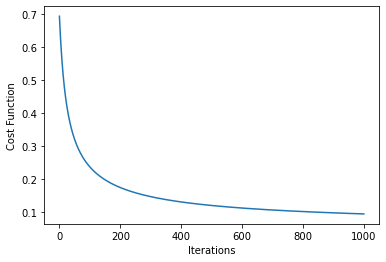

Accuracy,Precision,Recall =  0.9414893617021277 1.0 0.8307692307692308

Iteration number :  2 

Using batch gradient
Iteration number :  3 

Using batch gradient
Iteration number :  4 

Using batch gradient
Iteration number :  5 

Using batch gradient
Iteration number :  6 

Using batch gradient
Iteration number :  7 

Using batch gradient
Iteration number :  8 

Using batch gradient
Iteration number :  9 

Using batch gradient
Iteration number :  10 

Using batch gradient
Mean accuracy for 10 iterations =  0.9627659574468085
Mean precision for 10 iterations =  0.9954020221473279
Mean recall for 10 iterations =  0.9024528820113717


In [4]:
# Unnormalized data



print("Enter 0/1/2 for batch/minibatch/stochastic")
key=int(input())
print("enter threshold for non normalized")
thr1=float(input())
accu=0
preci=0
rec=0

for i in range(10):
    print("Iteration number : ",i+1,"\n")
    # Shuffle the original dataset
    df = df.sample(frac=1).reset_index(drop=True)

    # X_train,X_test,y_train,y_test = train_test_split(df_drop_na,df_na_map,test_size=0.33)

     # deriving the training and testing datasets
    numOfDataPoints = np.shape(df)[0]
    trainingDataPoints = (int)(67/100 * numOfDataPoints)
    
    TrainingDataSet = df[:trainingDataPoints]
    TestingDataSet = df[trainingDataPoints:]

    # filling null values with mean
    TrainingDataSet = TrainingDataSet.fillna(TrainingDataSet.mean())
    TestingDataSet = TestingDataSet.fillna(TrainingDataSet.mean())

    X_train = TrainingDataSet.drop('diagnosis', axis=1)
    y_train = TrainingDataSet['diagnosis']

    X_test = TestingDataSet.drop('diagnosis', axis=1)
    y_test = TestingDataSet['diagnosis']
    
    
    model=LogisticRegression()
    model.fit(X_train,y_train,key)

    y_pred=model.predict(X_test,thr1)
#     print(y_pred)
#     print()
    a=model.accuracy(X_test,y_test,thr1)
    p=model.precision(X_test,y_test,thr1)
    r=model.recall(X_test,y_test,thr1)
    accu+=a
    preci+=p
    rec+=r
    
    if (i%10==0):
        
        cost_=model.cost
        plt.plot(cost_)
        plt.xlabel('Iterations')
        plt.ylabel('Cost Function')
        plt.show()
        print("Accuracy,Precision,Recall = ",a,p,r)
        print()
    
print("Mean accuracy for 10 iterations = ",accu/10)
print("Mean precision for 10 iterations = ",preci/10)
print("Mean recall for 10 iterations = ",rec/10)






print("enter threshold for normalized")
thr2=float(input())
accuN=0
preciN=0
recN=0
for i in range(10):
    print("Iteration number : ",i+1,"\n")
    # Shuffle the original dataset
    df = df.sample(frac=1).reset_index(drop=True)

    # X_train,X_test,y_train,y_test = train_test_split(df_drop_na,df_na_map,test_size=0.33)

     # deriving the training and testing datasets
    numOfDataPoints = np.shape(df)[0]
    trainingDataPoints = (int)(67/100 * numOfDataPoints)
    
    TrainingDataSet = df[:trainingDataPoints]
    TestingDataSet = df[trainingDataPoints:]

    # filling null values with mean
    TrainingDataSet = TrainingDataSet.fillna(TrainingDataSet.mean())
    TestingDataSet = TestingDataSet.fillna(TrainingDataSet.mean())

    X_train = TrainingDataSet.drop('diagnosis', axis=1)
    y_train = TrainingDataSet['diagnosis']

    X_test = TestingDataSet.drop('diagnosis', axis=1)
    y_test = TestingDataSet['diagnosis']
    

#     X_train,X_test,y_train,y_test = train_test_split(df_feature_eng2,df_mapped,test_size=0.33)
    Normalized_X_train = (X_train - X_train.mean())/(X_train.std())
    Normalized_X_test = (X_test - X_train.mean())/(X_train.std())
    
    model=LogisticRegression()
    model.fit(Normalized_X_train,y_train,key)

    y_pred=model.predict(Normalized_X_test,thr2)
#   print(y_pred)
    a=model.accuracy(Normalized_X_test,y_test,thr2)
    p=model.precision(Normalized_X_test,y_test,thr2)
    r=model.recall(Normalized_X_test,y_test,thr2)
    accuN+=a
    preciN+=p
    recN+=r
    
    if (i%10==0):
        
        cost_=model.cost
        plt.plot(cost_)
        plt.xlabel('Iterations')
        plt.ylabel('Cost Function')
        plt.show()
        print("Accuracy,Precision,Recall = ",a,p,r)
        print()
    
    

print("Mean accuracy for 10 iterations = ",accuN/10)
print("Mean precision for 10 iterations = ",preciN/10)
print("Mean recall for 10 iterations = ",recN/10)


# we're printing graphs only for the first iteration